**Caio Teles Cunha 2020006434** 

**Ivan Vilaça de Assis 2021421931**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Direita, Cima, Esquerda, Baixo
def vizinhos(N):
  L=int(np.sqrt(N))
  viz = np.zeros((N,4),dtype=np.int16)
  for k in range(N):
    viz[k,0]=k+1
    if (k+1) % L == 0: 
      viz[k,0] = k+1-L
    viz[k,1] = k+L
    if k > (N-L-1): 
      viz[k,1] = k+L-N
    viz[k,2] = k-1
    if (k % L == 0): 
      viz[k,2] = k+L-1
    viz[k,3] = k-L
    if k < L: 
      viz[k,3] = k+N-L
  return viz

In [4]:
def calculaDensidade(L, Nmcs, b, k):
  # Gerando estado inicial
  N = L ** 2
  viz = vizinhos(N)
  populacao = np.random.choice(['C', 'D'], N, replace=True)

  for i in range(Nmcs):
    indRnd = np.random.randint(N)

    cooperadoresX = 0
    for i in viz[indRnd]:
      if(populacao[i] == 'C'):
        cooperadoresX += 1
        
    if(populacao[indRnd] == 'D'):
      Ex = cooperadoresX * b
    else:
      Ex = cooperadoresX + 1
    
    vizRnd = np.random.randint(4)
    vizInx = viz[indRnd][vizRnd]

    cooperadoresY = 0
    for i in viz[vizInx]:
      if(populacao[i] == 'C'):
        cooperadoresY += 1

    if(populacao[vizInx] == 'D'):
      Ey = cooperadoresY * b
    else:
      Ey = cooperadoresY + 1

    prob = np.random.random()
    w = 1 / (1 + np.exp(-(Ey - Ex) / k))
    if(w > prob):
      populacao[indRnd] = populacao[vizInx]

  return populacao

In [5]:
def plotDensidadePorValoresDeB(cList, bValues, Nmcs, K):  
  plt.title('Desidade de cooperadores depois de {} iterações \n e com k = {}'.format(Nmcs,K))
  plt.xlabel('b - Tentação à deserção')
  plt.ylabel('densidade de cooperadores')
  plt.plot(bValues, cList)
  plt.show()

In [6]:
def calcularDensidadesVariosBs(L, Nmcs, num_b, K):
  N = L ** 2
  bValues = np.linspace(1, 2, num_b)
  cList = np.zeros(num_b)

  for i in range(0, num_b):
    pop = calculaDensidade(L, Nmcs, bValues[i], K)
    NumCooperadores = np.count_nonzero(pop == 'C')
    c = NumCooperadores / N
    cList[i] = c
  
  plotDensidadePorValoresDeB(cList, bValues, Nmcs, K)

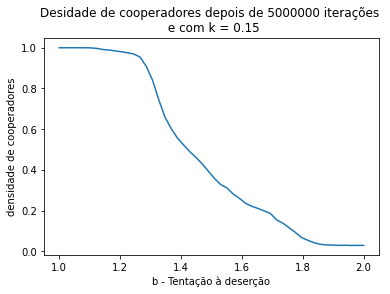

In [8]:
L = 200
Nmcs = 5_000_000
num_b = 50
K = 0.15
calcularDensidadesVariosBs(L, Nmcs, num_b, K)

Nós escolhemos um **K = 0.15** e encontramos para _b1_ um valor aproximado de _1.1_ e para _b2_ um valor aproximado de _1.9_